<img src = "https://global-uploads.webflow.com/5f0d53c042a9ed6288de7f8d/5f6337ae2cfaa10946ceeb06_Hacktiv8%20logo%20horizontal%2001%20black-p-500.png" width = 400>

---

# Final Project 1

## Perkenalan

Teammate:
1. Nindya Eka Apsari

2. Faradilla Ardiyani


PYTN-KS002

Studi Independen - Kampus Merdeka

### Latar Belakang

Mobilitas manusia dari hari ke hari semakin tinggi. Setiap hari, manusia melakukan perpindahan tempat menggunakan kendaraan seperti motor dan mobil. Di masa perkembangan teknologi ini, inovasi-inovasi pun mulai bermunculan. Salah satu inovasi di bidang transportasi yakni Taksi Online, di mana penumpang dapat dengan mudah memesan Taksi dengan spesifikasi yang diinginkannya.

Menjamurnya permintaan taksi online di seluruh dunia membuat banyak perusahaan berlomba-lomba menghadirkan kualitas layanan yang terbaik. Dari data yang tersimpan, dapat memunculkan prediksi untuk ke depannya. Dalam hal ini, data-data histori pemesanan taksi online, dapat dimanfaatkan untuk memprediksi tarif berdasarkan faktor-faktor pengaruhnya.

### Dataset

Analisis ini menggunakan dataset yang bersumber dari Kaggle dengan judul ["Uber vs Lyft"](https://www.kaggle.com/brllrb/uber-and-lyft-dataset-boston-ma)


Dataset ini berisikan histori pemesanan taksi online yang memiliki 57 atribut dengan 693071 rows. Atribut yang menjadi target yaitu atribut Price/Tarif, sedangkan atribut lainnya merupakan prediktor.

### Objektif yang ingin dicapai

Objective yang ingin dicapai dalam analisis ini yaitu:

- mengetahui faktor-faktor yang berpengaruh signifikan dalam memprediksi tarif harga Taksi Online

- dapat memprediksi tarif harga Taksi Online berdasarkan faktor-faktor yang mempengaruhinya menggunakan metode regresi linier


## Import Libraries

Melakukan import libraries yang digunakan dalam project ini

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import datetime
import calendar
from datetime import date
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import f_regression
import pickle

print('Libraries sudah siap!')

Libraries sudah siap!


## Data Loading

Melakukan loading dataset menggunakan library Pandas

In [2]:
df = pd.read_csv('rideshare_kaggle.csv')

Melakukan pengaturan yakni tidak memberi batasan maksimal kolom yang ditampilkan.

In [3]:
pd.set_option("display.max_columns", None)

Melihat 5 baris teratas dari dataset

In [4]:
df.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.0,42.2148,-71.033,42.34,37.12,Mostly Cloudy,Rain throughout the day.,0.0000,0.0,0.68,8.66,9.17,1545015600,10.000,43.68,1544968800,34.19,1545048000,37.95,1544968800,27.39,1545044400,partly-cloudy-night,32.70,1021.98,57,0.72,0,10.000,303.8,1544962084,1544994864,0.30,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,1.0,42.2148,-71.033,43.58,37.35,Rain,"Rain until morning, starting again in the eve...",0.1299,1.0,0.94,11.98,11.98,1543291200,4.786,47.30,1543251600,42.10,1543298400,43.92,1543251600,36.20,1543291200,rain,41.83,1003.97,90,1.00,0,4.786,291.1,1543232969,1543266992,0.64,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44,1.0,42.2148,-71.033,38.33,32.93,Clear,Light rain in the morning.,0.0000,0.0,0.75,7.33,7.33,1543334400,10.000,47.55,1543320000,33.10,1543402800,44.12,1543320000,29.11,1543392000,clear-night,31.10,992.28,240,0.03,0,10.000,315.7,1543319437,1543353364,0.68,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.0,0.44,1.0,42.2148,-71.033,34.38,29.63,Clear,Partly cloudy throughout the day.,0.0000,0.0,0.73,5.28,5.28,1543514400,10.000,45.03,1543510800,28.90,1543579200,38.53,1543510800,26.20,1543575600,clear-night,26.64,1013.73,310,0.00,0,10.000,291.1,1543492370,1543526114,0.75,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.0,0.44,1.0,42.2148,-71.033,37.44,30.88,Partly Cloudy,Mostly cloudy throughout the day.,0.0000,0.0,0.70,9.14,9.14,1543446000,10.000,42.18,1543420800,36.71,1543478400,35.75,1543420800,30.29,1543460400,partly-cloudy-night,28.61,998.36,303,0.44,0,10.000,347.7,1543405904,1543439738,0.72,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


Melihat 5 baris terbawah dari dataset

In [5]:
df.tail()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
693066,616d3611-1820-450a-9845-a9ff304a4842,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,13.0,1.0,1.0,42.3519,-71.0643,37.05,37.05,Partly Cloudy,Light rain in the morning and overnight.,0.0,0.0,0.74,2.34,2.87,1543672800,9.785,44.76,1543690800,34.83,1543712400,44.09,1543690800,35.48,1543712400,partly-cloudy-night,29.65,1023.57,133,0.31,0,9.785,271.5,1543665331,1543698855,0.82,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693067,633a3fc3-1f86-4b9e-9d48-2b7132112341,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,9.5,1.0,1.0,42.3519,-71.0643,37.05,37.05,Partly Cloudy,Light rain in the morning and overnight.,0.0,0.0,0.74,2.34,2.87,1543672800,9.785,44.76,1543690800,34.83,1543712400,44.09,1543690800,35.48,1543712400,partly-cloudy-night,29.65,1023.57,133,0.31,0,9.785,271.5,1543665331,1543698855,0.82,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693068,64d451d0-639f-47a4-9b7c-6fd92fbd264f,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,NaN,1.0,1.0,42.3519,-71.0643,37.05,37.05,Partly Cloudy,Light rain in the morning and overnight.,0.0,0.0,0.74,2.34,2.87,1543672800,9.785,44.76,1543690800,34.83,1543712400,44.09,1543690800,35.48,1543712400,partly-cloudy-night,29.65,1023.57,133,0.31,0,9.785,271.5,1543665331,1543698855,0.82,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693069,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,27.0,1.0,1.0,42.3519,-71.0643,37.05,37.05,Partly Cloudy,Light rain in the morning and overnight.,0.0,0.0,0.74,2.34,2.87,1543672800,9.785,44.76,1543690800,34.83,1543712400,44.09,1543690800,35.48,1543712400,partly-cloudy-night,29.65,1023.57,133,0.31,0,9.785,271.5,1543665331,1543698855,0.82,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693070,e7fdc087-fe86-40a5-a3c3-3b2a8badcbda,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,997acbb5-e102-41e1-b155-9df7de0a73f2,UberPool,10.0,1.0,1.0,42.3519,-71.0643,37.05,37.05,Partly Cloudy,Light rain in the morning and overnight.,0.0,0.0,0.74,2.34,2.87,1543672800,9.785,44.76,1543690800,34.83,1543712400,44.09,1543690800,35.48,1543712400,partly-cloudy-night,29.65,1023.57,133,0.31,0,9.785,271.5,1543665331,1543698855,0.82,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800


Melihat informasi kolom, baris, dan data type

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

Terlihat terdapat atribut yang memiliki kesamaan atau dapat diwakilkan dengan atribut yang lain, dataset memiliki baris yang banyak yaitu 693071 baris, dan memiliki tipe data yang bervariasi yakni float, integer, dan object.

Melihat matriks dataset dengan [.shape]()

Terlihat dataset memiliki 693071 baris dan 57 kolom

In [7]:
df.shape

(693071, 57)

Menggunakan [.columns]() untuk melihat rincian nama kolom yang ada

In [8]:
df.columns

Index(['id', 'timestamp', 'hour', 'day', 'month', 'datetime', 'timezone',
       'source', 'destination', 'cab_type', 'product_id', 'name', 'price',
       'distance', 'surge_multiplier', 'latitude', 'longitude', 'temperature',
       'apparentTemperature', 'short_summary', 'long_summary',
       'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'windGustTime', 'visibility', 'temperatureHigh',
       'temperatureHighTime', 'temperatureLow', 'temperatureLowTime',
       'apparentTemperatureHigh', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureLowTime', 'icon',
       'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex',
       'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase',
       'precipIntensityMax', 'uvIndexTime', 'temperatureMin',
       'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime',
       'apparentTemperatureMin', 'apparentTemperatureMinTime',
       'apparentTemperat

Mengecek missing value dengan [.isnull()]() serta menjumlahkannya dengan menambah [.sum]()

In [9]:
df.isnull().sum()

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

Diperoleh bahwa terdapat 55095 nilai yang kosong pada atribut Price. Untuk itu perlu adanya penanganan yang dilakukan.

Menggunakan [.describe()]() untuk mengecek statistik deskriptif dari masing-masing atribut yang bertipe numeric.

In [10]:
df.describe()

,timestamp,hour,day,month,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
count,6.930710e+05,693071.000000,693071.000000,693071.000000,637976.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,6.930710e+05,693071.000000,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,6.930710e+05,6.930710e+05,693071.000000,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05
mean,1.544046e+09,11.619137,17.794365,11.586684,16.545125,2.189430,1.013870,42.338172,-71.066151,39.584388,35.881222,0.008922,0.146076,0.741119,6.186253,8.469860,1.544049e+09,8.467970,45.040982,1.544050e+09,34.150736,1.544102e+09,41.614054,1.544050e+09,30.139824,1.544099e+09,31.656256,1010.094766,220.055853,0.686502,0.248908,8.467970,313.513635,1.544027e+09,1.544060e+09,0.579066,0.037374,1.544044e+09,33.457774,1.544042e+09,45.261313,1.544047e+09,29.731002,1.544048e+09,41.997343,1.544048e+09
std,6.891925e+05,6.948114,9.982286,0.492429,9.324359,1.138937,0.091641,0.047840,0.020302,6.726084,7.918707,0.026901,0.328938,0.138595,3.148223,5.289179,6.928244e+05,2.602888,5.996541,6.937921e+05,6.383163,6.922923e+05,7.666138,6.941699e+05,8.057468,6.927378e+05,9.142355,13.472899,99.102736,0.358534,0.474097,2.602888,27.953061,6.911393e+05,6.906634e+05,0.244705,0.055214,6.912028e+05,6.467224,6.901954e+05,5.645046,6.901353e+05,7.110494,6.871862e+05,6.936841,6.910777e+05
min,1.543204e+09,0.000000,1.000000,11.000000,2.500000,0.020000,1.000000,42.214800,-71.105400,18.910000,12.130000,0.000000,0.000000,0.380000,0.450000,0.800000,1.543151e+09,0.717000,32.680000,1.543154e+09,17.850000,1.543234e+09,22.620000,1.543187e+09,11.810000,1.543234e+09,4.390000,988.090000,2.000000,0.000000,0.000000,0.717000,269.400000,1.543147e+09,1.543181e+09,0.090000,0.000000,1.543162e+09,15.630000,1.543122e+09,33.510000,1.543154e+09,11.810000,1.543136e+09,28.950000,1.543187e+09
25%,1.543444e+09,6.000000,13.000000,11.000000,9.000000,1.280000,1.000000,42.350300,-71.081000,36.450000,31.910000,0.000000,0.000000,0.640000,3.410000,4.060000,1.543432e+09,8.432000,42.570000,1.543439e+09,30.170000,1.543489e+09,36.570000,1.543439e+09,27.700000,1.543478e+09,27.490000,999.820000,124.000000,0.370000,0.000000,8.432000,290.900000,1.543406e+09,1.543440e+09,0.300000,0.000000,1.543421e+09,30.170000,1.543399e+09,42.570000,1.543439e+09,27.760000,1.543399e+09,36.570000,1.543439e+09
50%,1.543737e+09,12.000000,17.000000,12.000000,13.500000,2.160000,1.000000,42.351900,-71.063100,40.490000,35.900000,0.000000,0.000000,0.710000,5.910000,7.550000,1.543756e+09,9.880000,44.680000,1.543788e+09,34.180000,1.543817e+09,40.950000,1.543788e+09,30.030000,1.543817e+09,30.690000,1009.250000,258.000000,0.820000,0.000000,9.880000,307.400000,1.543752e+09,1.543785e+09,0.680000,0.000400,1.543770e+09,34.240000,1.543727e+09,44.680000,1.543788e+09,30.130000,1.543745e+09,40.950000,1.543788e+09
75%,1.544828e+09,18.000000,28.000000,12.000000,22.500000,2.920000,1.000000,42.364700,-71.054200,43.580000,40.080000,0.000000,0.000000,0.880000,8.410000,11.740000,1.544846e+09,9.996000,46.910000,1.544814e+09,38.730000,1.544836e+09,44.120000,1.544818e+09

Menggunakan [.describe()]() untuk mengecek statistik deskriptif dari masing-masing atribut yang bertipe object.

In [11]:
df.describe(include='O')

,id,datetime,timezone,source,destination,cab_type,product_id,name,short_summary,long_summary,icon
count,693071,693071,693071,693071,693071,693071,693071,693071,693071,693071,693071
unique,693071,31350,1,12,12,2,13,13,9,11,7
top,071aeea0-52c2-4c7d-aa74-7799d058ff5a,2018-11-28 19:17:08,America/New_York,Financial District,Financial District,Uber,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,Overcast,Mostly cloudy throughout the day.,cloudy
freq,1,156,693071,58857,58851,385663,55096,55096,218895,202340,218895


Melihat banyaknya unique values untuk tiap atribut.

In [12]:
for col in df.columns:
    print(col,': ', df[col].nunique())

id :  693071
timestamp :  36179
hour :  24
day :  17
month :  2
datetime :  31350
timezone :  1
source :  12
destination :  12
cab_type :  2
product_id :  13
name :  13
price :  147
distance :  549
surge_multiplier :  7
latitude :  11
longitude :  12
temperature :  308
apparentTemperature :  319
short_summary :  9
long_summary :  11
precipIntensity :  63
precipProbability :  29
humidity :  51
windSpeed :  291
windGust :  286
windGustTime :  25
visibility :  227
temperatureHigh :  129
temperatureHighTime :  23
temperatureLow :  133
temperatureLowTime :  31
apparentTemperatureHigh :  124
apparentTemperatureHighTime :  27
apparentTemperatureLow :  136
apparentTemperatureLowTime :  32
icon :  7
dewPoint :  313
pressure :  316
windBearing :  195
cloudCover :  83
uvIndex :  3
visibility.1 :  227
ozone :  274
sunriseTime :  110
sunsetTime :  114
moonPhase :  18
precipIntensityMax :  65
uvIndexTime :  20
temperatureMin :  131
temperatureMinTime :  25
temperatureMax :  128
temperatureMaxTime : 

Melihat unique value untuk atribut [cab_type]()

In [13]:
df['cab_type'].unique()

array(['Lyft', 'Uber'], dtype=object)

## Data Cleaning

Bagian ini berisi proses penyiapan data berupa data cleaning sebelum dilakukan explorasi data lebih lanjut.

Melakukan pengecekan duplikasi data.

Diperoleh tidak ada duplikasi data.

In [14]:
df.duplicated().sum()

0

Melakukan pengecekan missing value pada atribut Price.

Diperoleh terdapat 55095 baris yang merupakan nilai yang kosong. Untuk itu perlu dilakukan penanganan terhadap missing value ini.

In [15]:
df['price'].isnull().sum()

55095

Melihat banyak persen dari nilai yang hilang pada atribut Price.

Diperoleh 7.9% merupakan missing values dari keseluruhan dataset pada atribut Price.

In [16]:
print(df['price'].isnull().sum()/df.shape[0] * 100, '%')

7.949402009317949 %


Melakukan penanganan missing value, yaitu dengan menghapus baris yang merupakan missing value menggunakan [.drop]()

In [17]:
df2 = df.drop(df[df['price'].isnull()].index)

Membandingkan ukuran matriks dataset sebelum dan sesudah dilakukan penanganan missing values.

In [18]:
df.shape, df2.shape

((693071, 57), (637976, 57))

Melakukan pengecekan missing value, untuk memastikan bahwa tidak ada missing value atau missing value sudah ditangani dengan baik.

In [19]:
df2.isnull().sum()

id                             0
timestamp                      0
hour                           0
day                            0
month                          0
datetime                       0
timezone                       0
source                         0
destination                    0
cab_type                       0
product_id                     0
name                           0
price                          0
distance                       0
surge_multiplier               0
latitude                       0
longitude                      0
temperature                    0
apparentTemperature            0
short_summary                  0
long_summary                   0
precipIntensity                0
precipProbability              0
humidity                       0
windSpeed                      0
windGust                       0
windGustTime                   0
visibility                     0
temperatureHigh                0
temperatureHighTime            0
temperatur

Melakukan crosstab atribut product_id dan name.

Diperoleh hasil bahwa kedua atribut tersebut sama, sehingga dilakukan penghapusan atribut product_id.

In [20]:
pd.crosstab(df.product_id, df.name)

name,Black,Black SUV,Lux,Lux Black,Lux Black XL,Lyft,Lyft XL,Shared,Taxi,UberPool,UberX,UberXL,WAV
product_id,,,,,,,,,,,,,
55c66225-fbe7-4fd5-9072-eab1ece5e23e,0,0,0,0,0,0,0,0,0,0,55094,0,0
6c84fd89-3f11-4782-9b50-97c468b19529,55095,0,0,0,0,0,0,0,0,0,0,0,0
6d318bcc-22a3-4af6-bddd-b409bfce1546,0,55096,0,0,0,0,0,0,0,0,0,0,0
6f72dfc5-27f1-42e8-84db-ccc7a75f6969,0,0,0,0,0,0,0,0,0,0,0,55096,0
8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,0,0,0,0,0,0,0,0,55095,0,0,0,0
997acbb5-e102-41e1-b155-9df7de0a73f2,0,0,0,0,0,0,0,0,0,55091,0,0,0
9a0e7b09-b92b-4c41-9779-2ad22b4d779d,0,0,0,0,0,0,0,0,0,0,0,0,55096
lyft,0,0,0,0,0,51235,0,0,0,0,0,0,0
lyft_line,0,0,0,0,0,0,0,51233,0,0,0,0,0


Melakukan inisiasi atribut yang akan dihapus. Hal ini dilakukan karena atribut tersebut memiliki kesamaan dan dapat diwakilkan dengan atribut lainnya.

In [21]:
remove1_cols = ["id", "timestamp", "timezone", "product_id", "latitude", "longitude"]

remove2_cols = ["precipIntensity", "precipProbability", "windGustTime", "temperatureHigh", "temperatureHighTime", "temperatureLow", 
                "temperatureLowTime", "apparentTemperatureHigh", "apparentTemperatureHighTime", "apparentTemperatureLow", 
                "apparentTemperatureLowTime", "icon", "dewPoint", "windBearing", "uvIndex", "visibility.1", "ozone", "sunriseTime", 
                "sunsetTime", "uvIndexTime", "temperatureMin", "temperatureMinTime", "temperatureMax", "temperatureMaxTime", 
                "apparentTemperatureMin", "apparentTemperatureMinTime", "apparentTemperatureMax", "apparentTemperatureMaxTime", 
                "apparentTemperature"]

Melakukan penghapusan atribut dengan [.drop]()

In [22]:
df3 = df2.drop(remove1_cols, axis=1)

df3 = df3.drop(remove2_cols, axis=1)

Melihat 5 baris teratas dari dataset terbaru

In [23]:
df3.head()

,hour,day,month,datetime,source,destination,cab_type,name,price,distance,surge_multiplier,temperature,short_summary,long_summary,humidity,windSpeed,windGust,visibility,pressure,cloudCover,moonPhase,precipIntensityMax
0,9,16,12,2018-12-16 09:30:07,Haymarket Square,North Station,Lyft,Shared,5.0,0.44,1.0,42.34,Mostly Cloudy,Rain throughout the day.,0.68,8.66,9.17,10.000,1021.98,0.72,0.30,0.1276
1,2,27,11,2018-11-27 02:00:23,Haymarket Square,North Station,Lyft,Lux,11.0,0.44,1.0,43.58,Rain,"Rain until morning, starting again in the eve...",0.94,11.98,11.98,4.786,1003.97,1.00,0.64,0.1300
2,1,28,11,2018-11-28 01:00:22,Haymarket Square,North Station,Lyft,Lyft,7.0,0.44,1.0,38.33,Clear,Light rain in the morning.,0.75,7.33,7.33,10.000,992.28,0.03,0.68,0.1064
3,4,30,11,2018-11-30 04:53:02,Haymarket Square,North Station,Lyft,Lux Black XL,26.0,0.44,1.0,34.38,Clear,Partly cloudy throughout the day.,0.73,5.28,5.28,10.000,1013.73,0.00,0.75,0.0000
4,3,29,11,2018-11-29 03:49:20,Haymarket Square,North Station,Lyft,Lyft XL,9.0,0.44,1.0,37.44,Partly Cloudy,Mostly cloudy throughout the day.,0.70,9.14,9.14,10.000,998.36,0.44,0.72,0.0001


Memberikan nama baru untuk setiap atribut.

In [24]:
df3 = df3.rename(columns={'hour':'Jam', 'day':'Hari','month':'Bulan', 'source':'Asal', 'destination': 'Tujuan','cab_type':'Merek',
                        'name':'Produk','price':'Tarif','distance':'Jarak', 'temperature':'Suhu','humidity':'Kelembapan','short_summary':'Cuaca',
                        'pressure':'Tekanan', 'datetime':'Tanggal','long_summary':'Keterangan', 'surge_multiplier':'Surge_multiplier','windSpeed':'Kecepatan_angin', 'windGust':'Hembusan_angin','cloudCover':'Tutupan_awan', 
                        'visibility':'Visibilitas', 'moonPhase':'Fase_bulan','precipIntensityMax':'Intensitas_maks'})

In [25]:
df3.head()

,Jam,Hari,Bulan,Tanggal,Asal,Tujuan,Merek,Produk,Tarif,Jarak,Surge_multiplier,Suhu,Cuaca,Keterangan,Kelembapan,Kecepatan_angin,Hembusan_angin,Visibilitas,Tekanan,Tutupan_awan,Fase_bulan,Intensitas_maks
0,9,16,12,2018-12-16 09:30:07,Haymarket Square,North Station,Lyft,Shared,5.0,0.44,1.0,42.34,Mostly Cloudy,Rain throughout the day.,0.68,8.66,9.17,10.000,1021.98,0.72,0.30,0.1276
1,2,27,11,2018-11-27 02:00:23,Haymarket Square,North Station,Lyft,Lux,11.0,0.44,1.0,43.58,Rain,"Rain until morning, starting again in the eve...",0.94,11.98,11.98,4.786,1003.97,1.00,0.64,0.1300
2,1,28,11,2018-11-28 01:00:22,Haymarket Square,North Station,Lyft,Lyft,7.0,0.44,1.0,38.33,Clear,Light rain in the morning.,0.75,7.33,7.33,10.000,992.28,0.03,0.68,0.1064
3,4,30,11,2018-11-30 04:53:02,Haymarket Square,North Station,Lyft,Lux Black XL,26.0,0.44,1.0,34.38,Clear,Partly cloudy throughout the day.,0.73,5.28,5.28,10.000,1013.73,0.00,0.75,0.0000
4,3,29,11,2018-11-29 03:49:20,Haymarket Square,North Station,Lyft,Lyft XL,9.0,0.44,1.0,37.44,Partly Cloudy,Mostly cloudy throughout the day.,0.70,9.14,9.14,10.000,998.36,0.44,0.72,0.0001


Memberikan nama baru untuk nilai dalam atribut Produk

In [26]:
df3.loc[df3['Produk'] == 'Taxi', 'Produk'] = 'Uber Taxi'
df3.loc[df3['Produk'] == 'Shared', 'Produk'] = 'Lyft Shared'
df3.loc[df3['Produk'] == 'Lux', 'Produk'] = 'Lyft Lux'
df3.loc[df3['Produk'] == 'Lyft', 'Produk'] = 'Lyft Regular'
df3.loc[df3['Produk'] == 'Black SUV', 'Produk'] = 'Uber Black SUV'
df3.loc[df3['Produk'] == 'WAV', 'Produk'] = 'Uber WAV'
df3.loc[df3['Produk'] == 'Black', 'Produk'] = 'Uber Black'

Melihat 5 baris teratas dari dataset terbaru

In [27]:
df3.head()

,Jam,Hari,Bulan,Tanggal,Asal,Tujuan,Merek,Produk,Tarif,Jarak,Surge_multiplier,Suhu,Cuaca,Keterangan,Kelembapan,Kecepatan_angin,Hembusan_angin,Visibilitas,Tekanan,Tutupan_awan,Fase_bulan,Intensitas_maks
0,9,16,12,2018-12-16 09:30:07,Haymarket Square,North Station,Lyft,Lyft Shared,5.0,0.44,1.0,42.34,Mostly Cloudy,Rain throughout the day.,0.68,8.66,9.17,10.000,1021.98,0.72,0.30,0.1276
1,2,27,11,2018-11-27 02:00:23,Haymarket Square,North Station,Lyft,Lyft Lux,11.0,0.44,1.0,43.58,Rain,"Rain until morning, starting again in the eve...",0.94,11.98,11.98,4.786,1003.97,1.00,0.64,0.1300
2,1,28,11,2018-11-28 01:00:22,Haymarket Square,North Station,Lyft,Lyft Regular,7.0,0.44,1.0,38.33,Clear,Light rain in the morning.,0.75,7.33,7.33,10.000,992.28,0.03,0.68,0.1064
3,4,30,11,2018-11-30 04:53:02,Haymarket Square,North Station,Lyft,Lux Black XL,26.0,0.44,1.0,34.38,Clear,Partly cloudy throughout the day.,0.73,5.28,5.28,10.000,1013.73,0.00,0.75,0.0000
4,3,29,11,2018-11-29 03:49:20,Haymarket Square,North Station,Lyft,Lyft XL,9.0,0.44,1.0,37.44,Partly Cloudy,Mostly cloudy throughout the day.,0.70,9.14,9.14,10.000,998.36,0.44,0.72,0.0001


Melihat banyaknya nilai dari masing-masing atribut

In [28]:
for col in df3.columns:
    print(col,': ')
    print(df3[col].value_counts())
    print("  ")
    print("  ")

Jam : 
0     29872
23    29355
17    28075
12    28017
13    27977
14    27976
16    27972
18    27958
11    27946
10    27918
15    27868
22    27093
9     26673
2     26323
1     26310
4     26125
21    25549
3     25530
19    25410
6     25147
20    24620
5     22995
7     22930
8     22337
Name: Jam, dtype: int64
  
  
Hari : 
27    70135
28    67842
29    55222
1     41680
30    41544
16    41359
17    41354
14    41344
15    41332
3     41323
2     41298
13    35496
18    33329
26    29028
4     11627
10     2534
9      1529
Name: Hari, dtype: int64
  
  
Bulan : 
12    374205
11    263771
Name: Bulan, dtype: int64
  
  
Tanggal : 
2018-11-26 23:33:14    151
2018-11-29 02:29:08    149
2018-11-29 02:47:08    146
2018-11-27 00:03:14    146
2018-11-29 04:38:08    146
                      ... 
2018-12-15 06:05:07      3
2018-12-14 11:50:07      3
2018-11-28 09:32:17      3
2018-11-30 13:17:58      1
2018-12-13 15:10:13      1
Name: Tanggal, Length: 31350, dtype: int64
  
  
Asal : 


Membuat atribut baru yakni Tarif per mile dimana diperoleh dari perhitungan Tarif dibagi Jarak

In [29]:
df4 = df3.copy()

df4["Tarif_per_mile"] = df4["Tarif"] / df4["Jarak"]

Melihat 5 baris teratas dari dataset terbaru

In [30]:
df4.head()

,Jam,Hari,Bulan,Tanggal,Asal,Tujuan,Merek,Produk,Tarif,Jarak,Surge_multiplier,Suhu,Cuaca,Keterangan,Kelembapan,Kecepatan_angin,Hembusan_angin,Visibilitas,Tekanan,Tutupan_awan,Fase_bulan,Intensitas_maks,Tarif_per_mile
0,9,16,12,2018-12-16 09:30:07,Haymarket Square,North Station,Lyft,Lyft Shared,5.0,0.44,1.0,42.34,Mostly Cloudy,Rain throughout the day.,0.68,8.66,9.17,10.000,1021.98,0.72,0.30,0.1276,11.363636
1,2,27,11,2018-11-27 02:00:23,Haymarket Square,North Station,Lyft,Lyft Lux,11.0,0.44,1.0,43.58,Rain,"Rain until morning, starting again in the eve...",0.94,11.98,11.98,4.786,1003.97,1.00,0.64,0.1300,25.000000
2,1,28,11,2018-11-28 01:00:22,Haymarket Square,North Station,Lyft,Lyft Regular,7.0,0.44,1.0,38.33,Clear,Light rain in the morning.,0.75,7.33,7.33,10.000,992.28,0.03,0.68,0.1064,15.909091
3,4,30,11,2018-11-30 04:53:02,Haymarket Square,North Station,Lyft,Lux Black XL,26.0,0.44,1.0,34.38,Clear,Partly cloudy throughout the day.,0.73,5.28,5.28,10.000,1013.73,0.00,0.75,0.0000,59.090909
4,3,29,11,2018-11-29 03:49:20,Haymarket Square,North Station,Lyft,Lyft XL,9.0,0.44,1.0,37.44,Partly Cloudy,Mostly cloudy throughout the day.,0.70,9.14,9.14,10.000,998.36,0.44,0.72,0.0001,20.454545


Membuat atribut baru yaitu mengekstrak hari dari atribut Tanggal

In [31]:
df4['Tanggal'] = df4['Tanggal'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d %H:%M:%S"))
df4['Hari_dlm_pekan'] = df4['Tanggal'].apply(lambda x: calendar.day_name[x.weekday()])

Melihat 15 baris teratas dari dataset terbaru

In [32]:
df4.head(15)

,Jam,Hari,Bulan,Tanggal,Asal,Tujuan,Merek,Produk,Tarif,Jarak,Surge_multiplier,Suhu,Cuaca,Keterangan,Kelembapan,Kecepatan_angin,Hembusan_angin,Visibilitas,Tekanan,Tutupan_awan,Fase_bulan,Intensitas_maks,Tarif_per_mile,Hari_dlm_pekan
0,9,16,12,2018-12-16 09:30:07,Haymarket Square,North Station,Lyft,Lyft Shared,5.0,0.44,1.0,42.34,Mostly Cloudy,Rain throughout the day.,0.68,8.66,9.17,10.000,1021.98,0.72,0.30,0.1276,11.363636,Sunday
1,2,27,11,2018-11-27 02:00:23,Haymarket Square,North Station,Lyft,Lyft Lux,11.0,0.44,1.0,43.58,Rain,"Rain until morning, starting again in the eve...",0.94,11.98,11.98,4.786,1003.97,1.00,0.64,0.1300,25.000000,Tuesday
2,1,28,11,2018-11-28 01:00:22,Haymarket Square,North Station,Lyft,Lyft Regular,7.0,0.44,1.0,38.33,Clear,Light rain in the morning.,0.75,7.33,7.33,10.000,992.28,0.03,0.68,0.1064,15.909091,Wednesday
3,4,30,11,2018-11-30 04:53:02,Haymarket Square,North Station,Lyft,Lux Black XL,26.0,0.44,1.0,34.38,Clear,Partly cloudy throughout the day.,0.73,5.28,5.28,10.000,1013.73,0.00,0.75,0.0000,59.090909,Friday
4,3,29,11,2018-11-29 03:49:20,Haymarket Square,North Station,Lyft,Lyft XL,9.0,0.44,1.0,37.44,Partly Cloudy,Mostly cloudy throughout the day.,0.70,9.14,9.14,10.000,998.36,0.44,0.72,0.0001,20.454545,Thursday
5,18,17,12,2018-12-17 18:25:12,Haymarket Square,North Station,Lyft,Lux Black,16.5,0.44,1.0,38.75,Overcast,Light rain in the morning and overnight.,0.84,7.19,8.88,8.325,1000.46,1.00,0.33,0.0221,37.500000,Monday
6,5,26,11,2018-11-26 05:03:00,Back Bay,Northeastern University,Lyft,Lyft XL,10.5,1.08,1.0,41.99,Overcast,"Rain until morning, starting again in the eve...",0.91,0.53,0.88,4.675,1014.11,1.00,0.64,0.1245,9.722222,Monday
7,19,2,12,2018-12-02 19:53:04,Back Bay,Northeastern University,Lyft,Lux Black,16.5,1.08,1.0,49.88,Light Rain,Light rain until evening.,0.93,3.38,3.38,3.052,1004.33,1.00,0.86,0.0916,15.277778,Sunday
8,6,3,12,2018-12-03 06:28:02,Back Bay,Northeastern University,Lyft,Lyft Shared,3.0,1.08,1.0,45.58,Foggy,Foggy in the morning.,0.96,1.25,2.09,1.413,1001.06,1.00,0.89,0.0004,2.777778,Monday
9,10,27,11,2018-11-27 10:45:22,Back Bay,Northeastern University,Lyft,Lux Black XL,27.5,1.08,1.0,45.45,Light Rain,Light rain in the morning.,0.93,6.87,7.42,2.686,989.98,1.00,0.68,0.1425,25.462963,Tuesday


Menghapus atribut Tanggal, karena dapat diwakilkan oleh atribut Hari, Bulan, dan Hari_dlm_pekan

In [33]:
df4 = df4.drop(["Tanggal"], axis=1)

Melihat 5 baris teratas dari dataset terbaru

In [34]:
df4.head()

,Jam,Hari,Bulan,Asal,Tujuan,Merek,Produk,Tarif,Jarak,Surge_multiplier,Suhu,Cuaca,Keterangan,Kelembapan,Kecepatan_angin,Hembusan_angin,Visibilitas,Tekanan,Tutupan_awan,Fase_bulan,Intensitas_maks,Tarif_per_mile,Hari_dlm_pekan
0,9,16,12,Haymarket Square,North Station,Lyft,Lyft Shared,5.0,0.44,1.0,42.34,Mostly Cloudy,Rain throughout the day.,0.68,8.66,9.17,10.000,1021.98,0.72,0.30,0.1276,11.363636,Sunday
1,2,27,11,Haymarket Square,North Station,Lyft,Lyft Lux,11.0,0.44,1.0,43.58,Rain,"Rain until morning, starting again in the eve...",0.94,11.98,11.98,4.786,1003.97,1.00,0.64,0.1300,25.000000,Tuesday
2,1,28,11,Haymarket Square,North Station,Lyft,Lyft Regular,7.0,0.44,1.0,38.33,Clear,Light rain in the morning.,0.75,7.33,7.33,10.000,992.28,0.03,0.68,0.1064,15.909091,Wednesday
3,4,30,11,Haymarket Square,North Station,Lyft,Lux Black XL,26.0,0.44,1.0,34.38,Clear,Partly cloudy throughout the day.,0.73,5.28,5.28,10.000,1013.73,0.00,0.75,0.0000,59.090909,Friday
4,3,29,11,Haymarket Square,North Station,Lyft,Lyft XL,9.0,0.44,1.0,37.44,Partly Cloudy,Mostly cloudy throughout the day.,0.70,9.14,9.14,10.000,998.36,0.44,0.72,0.0001,20.454545,Thursday


Membuat atribut baru yakni menggabungkan atribut Asal dan Tujuan

In [35]:
df4["Rute"] = df4["Asal"] + "-" + df4['Tujuan']
df4["Rute"]

0         Haymarket Square-North Station
1         Haymarket Square-North Station
2         Haymarket Square-North Station
3         Haymarket Square-North Station
4         Haymarket Square-North Station
                       ...              
693065                West End-North End
693066                West End-North End
693067                West End-North End
693069                West End-North End
693070                West End-North End
Name: Rute, Length: 637976, dtype: object

## Exploratory Data Analysis

### Descriptive Statistics & Query

Melihat statistik descriptif pada data numerik

In [36]:
df4.describe()

,Jam,Hari,Bulan,Tarif,Jarak,Surge_multiplier,Suhu,Kelembapan,Kecepatan_angin,Hembusan_angin,Visibilitas,Tekanan,Tutupan_awan,Fase_bulan,Intensitas_maks,Tarif_per_mile
count,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000
mean,11.618528,17.797674,11.586550,16.545125,2.189261,1.015068,39.582406,0.741056,6.186795,8.470616,8.469180,1010.092744,0.686291,0.579076,0.037369,9.687674
std,6.948776,9.982083,0.492452,9.324359,1.135413,0.095422,6.725500,0.138575,3.147856,5.288683,2.601828,13.475580,0.358599,0.244674,0.055216,13.705589
min,0.000000,1.000000,11.000000,2.500000,0.020000,1.000000,18.910000,0.380000,0.450000,0.800000,0.717000,988.090000,0.000000,0.090000,0.000000,0.556586
25%,6.000000,13.000000,11.000000,9.000000,1.270000,1.000000,36.450000,0.640000,3.410000,4.060000,8.432000,999.820000,0.370000,0.300000,0.000000,4.661017
50%,12.000000,17.000000,12.000000,13.500000,2.160000,1.000000,40.490000,0.710000,5.910000,7.550000,9.880000,1009.250000,0.820000,0.680000,0.000400,7.492326
75%,18.000000,28.000000,12.000000,22.500000,2.930000,1.000000,43.580000,0.880000,8.410000,11.740000,9.996000,1021.860000,1.000000,0.790000,0.091600,11.538462
max,23.000000,30.000000,12.000000,97.500000,7.860000,3.000000,57.220000,0.960000,15.000000,27.250000,10.000000,1035.550000,1.000000,0.930000,0.145900,1375.000000


Diperoleh bahwa:
- jarak terjauh yakni 7.86 miles dengan tarif maksimal yakni 97.5 dollar
- suhu rata-rata berada pada 39.58derajat Fahrenheit
- rata-rata pemesanan Taksi Online berada pada jam 11

Selanjutnya melihat statistik descriptif pada data kategorik

In [37]:
df4.describe(include='O')

,Asal,Tujuan,Merek,Produk,Cuaca,Keterangan,Hari_dlm_pekan,Rute
count,637976,637976,637976,637976,637976,637976,637976,637976
unique,12,12,2,12,9,11,7,72
top,Financial District,Financial District,Uber,Uber WAV,Overcast,Mostly cloudy throughout the day.,Tuesday,Financial District-South Station
freq,54197,54192,330568,55096,201429,186262,115091,9534


Diperoleh bahwa:
- Terdapat 12 tempat asal dan tujuan
- Terdapat 2 merek taksi online pada dataset ini, yakni Uber dan Lyft
- Cuaca yang paling sering muncul yakni Overcast
- Hari dengan paling banyak pemesanan taksi online yakni Tuesday
- Rute paling banyak dipesan yakni Financial District-South Station

Selanjutnya, melakukan grouping pada atribut Merek dan Tarif untuk melihat rata-ratanya

In [38]:
mean1 = df4[['Merek','Tarif']].groupby('Merek').mean().sort_values(by='Tarif', ascending=True)
mean1

,Tarif
Merek,
Uber,15.795343
Lyft,17.351396


Diperoleh bahwa Merek Uber memiliki Tarif rata-rata yakni 15.79 dollars, sedangkan Lyft yaitu 17.35 dollars

Selanjutnya, melakukan crosstab pada atribut Merek dan Produk untuk melihat proporsi dataset

In [39]:
pd.crosstab(df4.Merek, df4.Produk)

Produk,Lux Black,Lux Black XL,Lyft Lux,Lyft Regular,Lyft Shared,Lyft XL,Uber Black,Uber Black SUV,Uber WAV,UberPool,UberX,UberXL
Merek,,,,,,,,,,,,
Lyft,51235,51235,51235,51235,51233,51235,0,0,0,0,0,0
Uber,0,0,0,0,0,0,55095,55096,55096,55091,55094,55096


Diperoleh bahwa dataset sudah diklasifikasikan dengan benar, yakni Produk dengan Merek yang sesuai, juga untuk proporsi data tidak memiliki perbedaan yang signifikan atau relatif sama.

Selanjutnya melakukan crosstab pada atribut Merek dan Tujuan

In [40]:
pd.crosstab(df4.Merek, df4.Tujuan)

Tujuan,Back Bay,Beacon Hill,Boston University,Fenway,Financial District,Haymarket Square,North End,North Station,Northeastern University,South Station,Theatre District,West End
Merek,,,,,,,,,,,,
Lyft,25650,25464,25614,25620,26238,25613,25614,25326,25619,25620,25536,25494
Uber,27540,27376,27557,27546,27954,27558,27550,27251,27546,27539,27653,27498


Diperoleh bahwa pada semua Tujuan, Merek Uber memiliki proporsi data yang lebih tinggi dari pada Merek Lyft.

### Boxplot

Melakukan visualisasi Boxplot untuk melihat distribusi data, outlier data

Text(0.5, 1.0, 'Tarif vs Merek')

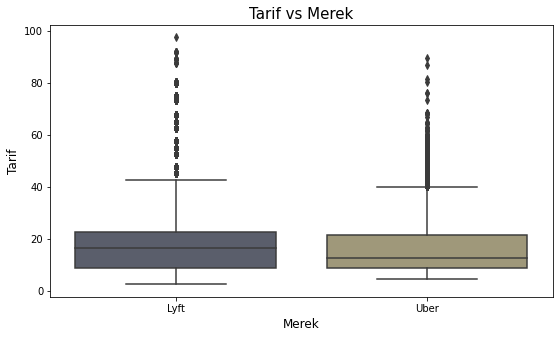

In [41]:
fig, ax = plt.subplots(figsize=(9, 5))

sns.boxplot(x='Merek', y='Tarif', data=df4, palette="cividis")

plt.xlabel("Merek", fontsize= 12)
plt.ylabel("Tarif", fontsize= 12)
plt.title("Tarif vs Merek", fontsize= 15)

Pada Boxplot Lyft dan Uber saling memiliki outlier yang cukup banyak, distribusi data tidak jauh berbeda.

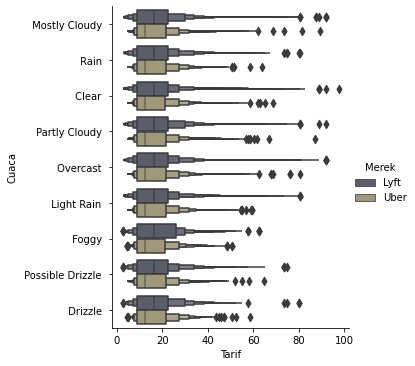

In [42]:
sns.catplot(x="Tarif", y="Cuaca", hue="Merek", kind="boxen", 
            data=df4, palette='cividis')

Diperoleh bahwa distribusi Cuaca terhadap Tarif tidak terlalu berbeda signifikan, serta memiliki banyak outlier.

Text(0.5, 1.0, 'Jarak vs Merek')

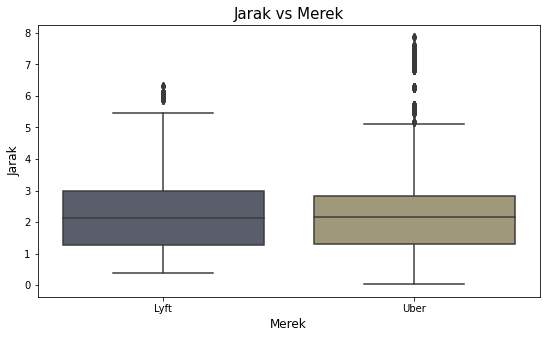

In [43]:
fig, ax = plt.subplots(figsize=(9, 5))

sns.boxplot(x='Merek', y='Jarak', data=df4, palette="cividis")

plt.xlabel("Merek", fontsize= 12)
plt.ylabel("Jarak", fontsize= 12)
plt.title("Jarak vs Merek", fontsize= 15)

Diperoleh bahwa Uber memiliki jangkauan jarak yang cukup jauh dengan Lyft serta outlier Uber juga lebih banyak dari Lyft.

### Histogram

Selanjutnya melakukan visualisasi histogram untuk melihat proporsi data.

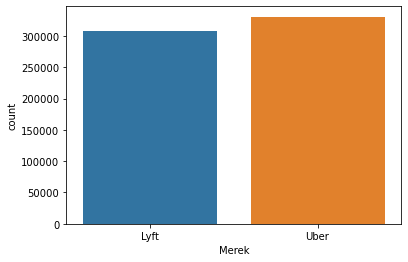

In [44]:
sns.countplot(x="Merek", data=df4)
plt.show()

Diperoleh bahwa proporsi data antara Merek Lyft dan Uber tidak berbeda signifikan.

### Correlation Matrix

Melakukan visualisasi korelasi antar variabel untuk melihat hubungan.

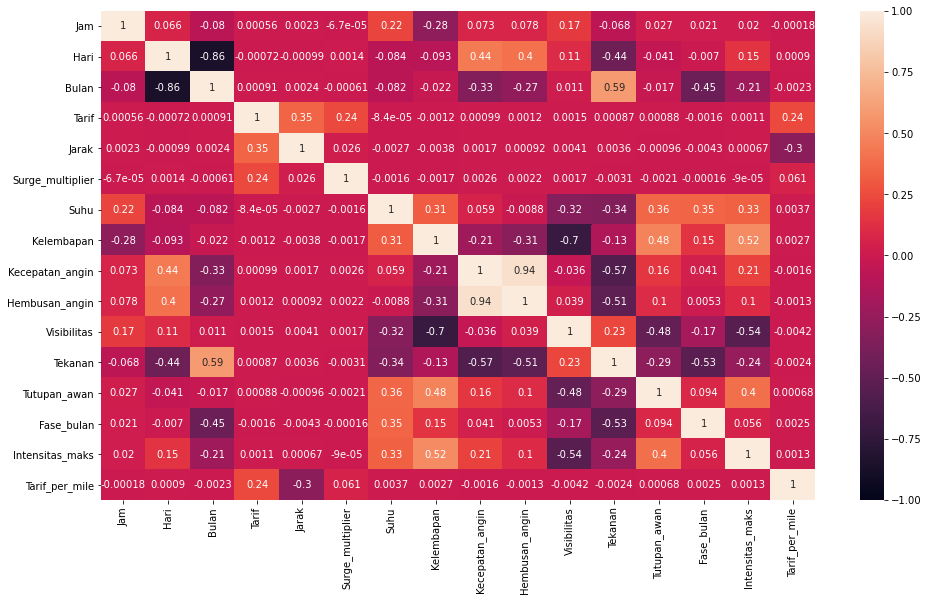

In [45]:
plt.figure(figsize=(16, 9))
sns.heatmap(df4.corr(), vmin=-1, vmax=1, annot=True)
plt.show()

Diperoleh:
- Atribut hari, suhu, kelembapan, fase bulan memiliki korelasi negatif dengan Tarif.
- Atribut selain yang disebutkan di atas memiliki korelasi positif terhadap Tarif.
- Korelasi paling tinggi yakni tarif dengan jarak, diikuti oleh tarif dengan surge multiplier.

## Data Preprocessing

Melakukan inisiasi variabel X dan Y

In [46]:
X = df4.drop(['Tarif', 'Tarif_per_mile'], axis=1)
y = df4['Tarif']
print(X.shape)
print(y.shape)

(637976, 22)
(637976,)


### Encode

Melakukan encoding dengan Label Encoder pada atribut yang memiliki tipe data Object.

In [47]:
class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns

    def fit(self,X,y=None):
        return self

    def transform(self,X):
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)
    
    
encoding_pipeline = Pipeline([
    ('encoding',MultiColumnLabelEncoder(columns=["Asal", "Tujuan", "Merek", "Produk", "Cuaca", "Keterangan",
                                                 "Hari_dlm_pekan", "Rute"]))
])
df5 = encoding_pipeline.fit_transform(df4)

Melihat 5 baris teratas dataset yang telah dilakukan encode.

In [48]:
df5.head()

,Jam,Hari,Bulan,Asal,Tujuan,Merek,Produk,Tarif,Jarak,Surge_multiplier,Suhu,Cuaca,Keterangan,Kelembapan,Kecepatan_angin,Hembusan_angin,Visibilitas,Tekanan,Tutupan_awan,Fase_bulan,Intensitas_maks,Tarif_per_mile,Hari_dlm_pekan,Rute
0,9,16,12,5,7,0,4,5.0,0.44,1.0,42.34,4,9,0.68,8.66,9.17,10.000,1021.98,0.72,0.30,0.1276,11.363636,3,33
1,2,27,11,5,7,0,2,11.0,0.44,1.0,43.58,8,10,0.94,11.98,11.98,4.786,1003.97,1.00,0.64,0.1300,25.000000,5,33
2,1,28,11,5,7,0,3,7.0,0.44,1.0,38.33,0,2,0.75,7.33,7.33,10.000,992.28,0.03,0.68,0.1064,15.909091,6,33
3,4,30,11,5,7,0,1,26.0,0.44,1.0,34.38,0,6,0.73,5.28,5.28,10.000,1013.73,0.00,0.75,0.0000,59.090909,0,33
4,3,29,11,5,7,0,5,9.0,0.44,1.0,37.44,6,4,0.70,9.14,9.14,10.000,998.36,0.44,0.72,0.0001,20.454545,4,33


Melakukan inisiasi variabel X dan Y sesudah dilakukan encode

In [49]:
X_transform = df5.drop(['Tarif', 'Tarif_per_mile'], axis=1)
y = df4['Tarif']
print(X.shape)
print(y.shape)

(637976, 22)
(637976,)


### Feature Selection

Melakukan feature selection menggunakan library SequentialFeatureSelector dengan Metode Rergesi Linier, banyak atribut 10, metode forward, evaluasi dengan R squared, dan cv dengan k=3.

In [50]:
sfs = SFS(LinearRegression(),
          k_features=10,
          forward=True,
          floating=False,
          scoring = 'r2', 
          cv = 3)

Diperoleh hasil dengan 10 feature/atribut yang paling berpengaruh dalam model

In [51]:
sfs.fit(X_transform, y)
sfs.k_feature_names_

('Hari',
 'Asal',
 'Tujuan',
 'Merek',
 'Produk',
 'Jarak',
 'Surge_multiplier',
 'Tekanan',
 'Intensitas_maks',
 'Rute')

Selain itu juga melakukan feature selection menggunakan library F regression dengan k=10

In [52]:
from sklearn.feature_selection import f_regression

X_transform = df5.drop(['Tarif', 'Tarif_per_mile'], axis=1)

bestfeatures = SelectKBest(score_func=f_regression, k=10)
fit = bestfeatures.fit(X_transform,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_transform.columns)
 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']

print("best 10 features are")
print(featureScores.nlargest(10,'Score'))

best 10 features are
               Specs         Score
6             Produk  86751.323337
7              Jarak  86228.749811
8   Surge_multiplier  39151.469570
5              Merek   4466.959446
4             Tujuan   1371.722040
21              Rute    582.615651
3               Asal    410.760893
20    Hari_dlm_pekan      5.225958
18        Fase_bulan      1.637163
15       Visibilitas      1.428760


Setelah diperoleh feature yang paling berpengaruh pada model, dilakukan inisiasi final pada variabel X yang akan dijadikan training.

Dalam hal ini dipilih 8 atribut yang paling berpengaruh signifikan berdasarkan kedua uji feature selsction yang telah dilakukan, yakni atribut produk, jarak, surge multiplier, merek, tujuan, asal, hari dlm pekan, dan visibilitas.

In [53]:
X_fit = df5[['Produk', 'Jarak', 'Surge_multiplier', 'Merek', 'Tujuan', 'Asal',
            'Hari_dlm_pekan', 'Visibilitas']]

Melihat 5 baris teratas dari dataframe X_fit

In [54]:
X_fit.head()

,Produk,Jarak,Surge_multiplier,Merek,Tujuan,Asal,Hari_dlm_pekan,Visibilitas
0,4,0.44,1.0,0,7,5,3,10.000
1,2,0.44,1.0,0,7,5,5,4.786
2,3,0.44,1.0,0,7,5,6,10.000
3,1,0.44,1.0,0,7,5,0,10.000
4,5,0.44,1.0,0,7,5,4,10.000


Melihat rincian datafram X_fit, yakni memiliki tipe data numerik

In [55]:
X_fit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 637976 entries, 0 to 693070
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Produk            637976 non-null  int32  
 1   Jarak             637976 non-null  float64
 2   Surge_multiplier  637976 non-null  float64
 3   Merek             637976 non-null  int32  
 4   Tujuan            637976 non-null  int32  
 5   Asal              637976 non-null  int32  
 6   Hari_dlm_pekan    637976 non-null  int32  
 7   Visibilitas       637976 non-null  float64
dtypes: float64(3), int32(5)
memory usage: 47.8 MB


Melihat dimensi X_fit, yakni memiliki 637976 baris dan 8 atribut.

In [56]:
X_fit.shape

(637976, 8)

Setelah diperoleh atribut yang akan dilakukan training, kemudian membagi data menjadi Training dan Testing dengan proporsi 0.8 dan 0.2

In [57]:
X_train, X_test, y_train, y_test = train_test_split(
    X_fit, y, test_size=0.20, random_state=325)

## Model Defining

Bagian ini berisi cell untuk mendefinisikan model sampai kompilasi model. Akan lebih bagus jika didahului dengan penjelasan mengapa memilih arsitektur atau jenis model tertentu, alasan memilih nilai hyperparameter, dan hal lain yang berkaitan.

Metode pengujian pada training ini menggunakan metode regresi linier dengan pembanding random forest regressor. Alasan penggunaan metode ini yaitu tipe data prediksi yang berupa data kontinu, sehingga metode tersebut cocok digunakan.

Model pertama yakni model regresi linier dengan menghilangkan nilai intercept. Alasan penghilangan intersep dikarenakan tarif tidak bisa berdiri sendiri tanpa adanya faktor yang mempengaruhinya. Jika tidak ada faktor atau dapat dikatakan tidak ada histori X maka tarif bernilai 0.

In [58]:
lr1 = LinearRegression(fit_intercept=False) 

Model kedua yakni model regresi linier dengan melakukan normalisasi data menggunakan mean. Hal ini dikarenakan atribut yang digunakan memiliki variasi pada satuan, sehingga hal tersebut dapat diatasi dengan normalisasi data.

In [59]:
lr2 = make_pipeline(StandardScaler(with_mean=True), LinearRegression())

Model ketiga yakni model Random Forest Regressor. Model ini digunakan sebagai pembanding dari model Regresi linier. Parameter yang digunakan yakni n estimator sejumlah 50, dikarenakan dataset ini memiliki baris yang sangat banyak sehingga cabang tree yang digunakan dapat diperkecil.

In [60]:
regr = RandomForestRegressor(n_estimators = 50, random_state = 13)

## Model Training

Cell pada bagian ini hanya berisi code untuk melatih model dan output yang dihasilkan.

In [61]:
lm_model1 = lr1.fit(X_train, y_train)

In [62]:
lm_model2 = lr2.fit(X_train, y_train)

In [63]:
regr_model = regr.fit(X_train, y_train)

## Model Evaluation

Pada bagian ini, dilakukan evaluasi model yang harus menunjukkan bagaimana performa model berdasarkan metrics yang dipilih. 

Linear Regression train R squared: 0.4733
Linear Regression test R squared: 0.4748
Linear Regression test RMSE: 6.7659


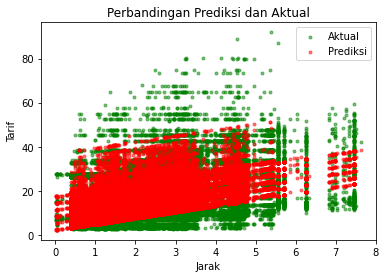

In [64]:
y_pred = lm_model1.predict(X_test)
lr_train_r2 = lr1.score(X_train, y_train)
lr_test_r2 = lr1.score(X_test, y_test)
print('Linear Regression train R squared: %.4f' % lr_train_r2)
print('Linear Regression test R squared: %.4f' % lr_test_r2)

lr_mse = mean_squared_error(y_pred, y_test)
lr_rmse = np.sqrt(lr_mse)
print('Linear Regression test RMSE: %.4f' % lr_rmse)

x_axis = X_test.Jarak 

plt.scatter(x_axis, y_test, c = 'g', alpha = 0.5, marker = '.', label = 'Aktual')
plt.scatter(x_axis, y_pred, c = 'r', alpha = 0.5, marker = '.', label = 'Prediksi')
plt.xlabel('Jarak')
plt.ylabel('Tarif') 
plt.title("Perbandingan Prediksi dan Aktual")
plt.legend(loc = 'upper right')
plt.show()

Linear Regression train R squared: 0.4739
Linear Regression test R squared: 0.4754
Linear Regression test RMSE: 6.7621


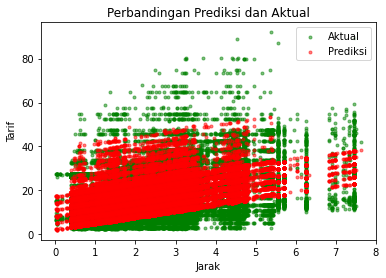

In [65]:
y_pred = lm_model2.predict(X_test)
lr_train_r2 = lr2.score(X_train, y_train)
lr_test_r2 = lr2.score(X_test, y_test)
print('Linear Regression train R squared: %.4f' % lr_train_r2)
print('Linear Regression test R squared: %.4f' % lr_test_r2)

lr_mse = mean_squared_error(y_pred, y_test)
lr_rmse = np.sqrt(lr_mse)
print('Linear Regression test RMSE: %.4f' % lr_rmse)

x_axis = X_test.Jarak 

plt.scatter(x_axis, y_test, c = 'g', alpha = 0.5, marker = '.', label = 'Aktual')
plt.scatter(x_axis, y_pred, c = 'r', alpha = 0.5, marker = '.', label = 'Prediksi')
plt.xlabel('Jarak')
plt.ylabel('Tarif') 
plt.title("Perbandingan Prediksi dan Aktual")
plt.legend(loc = 'upper right')

plt.show()

Random Forest train R squared is: 0.9874
Random Forest test R squared": 0.9626
Random Forest RMSE: 1.8044


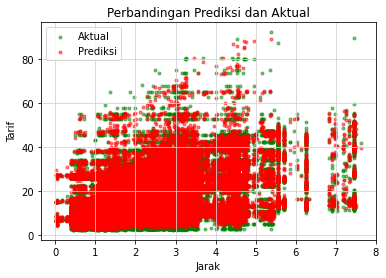

In [66]:
predictions = regr.predict(X_test)
l_rf_train_r2 = regr.score(X_train,y_train)
l_rf_test_r2 = regr.score(X_test, y_test)
print('Random Forest train R squared is: %.4f' % l_rf_train_r2)
print('Random Forest test R squared": %.4f' % l_rf_test_r2)

l_forest_mse = mean_squared_error(predictions, y_test)
l_forest_rmse = np.sqrt(l_forest_mse)
print('Random Forest RMSE: %.4f' % l_forest_rmse)

x_axis = X_test.Jarak

# Build scatterplot
plt.scatter(x_axis, y_test, c = 'g', alpha = 0.5, marker = '.', label = 'Aktual')
plt.scatter(x_axis, predictions, c = 'r', alpha = 0.5, marker = '.', label = 'Prediksi')
plt.xlabel('Jarak')
plt.ylabel('Tarif') 
plt.title("Perbandingan Prediksi dan Aktual")
plt.grid(color = '#D3D3D3', linestyle = 'solid')
plt.legend(loc = 'upper left')
plt.show()

Diperoleh bahwa:
- Model kedua memiliki nilai evaluasi model yang lebih baik dibandingkan model pertama.
- Data yang dilakukan normalisasi memiliki evaluasi model lebih baik daripada yang tidak dilakukan normalisasi.
- Model pembanding yakni model ketiga, memiliki evaluasi paling baik diantara ketiga model.
- Model akhir yang digunakan dalam analisis ini untuk selanjutnya diterapkan dalam deployment adalah model kedua, dikarenakan tujuan analisis ini membuat model prediksi menggunakan metode regresi linier.
- Model ketiga dapat digunakan menjadi alternatif lain di luar analisis ini.

## Model Inference

Bagian ini diisi dengan model inference, di mana model yang sudah kita latih akan dicoba pada data selain data yang sudah tersedia. Data yang dimaksud bisa berupa data buatan oleh student, ataupun data yang ada pada internet.

In [67]:
X_new = {'Produk':[1,2,3], 'Jarak':[1,2,3], 'Surge_multiplier':[1.25,2,3], 'Merek':[0,1,0], 'Tujuan':[1,2,3], 
         'Asal':[1,2,3],'Hari_dlm_pekan':[1,2,3], 'Visibilitas':[1,2,3]}
X_new = pd.DataFrame(X_new)

Melakukan prediksi pada data baru

In [68]:
y_pred1 = lm_model2.predict(X_new)
print('Prediksi Tarif yaitu: ')
print(y_pred1)

Prediksi Tarif yaitu: 
[22.72538284 54.90613808 58.19879657]


## Conclusions

Dari analisis yang telah dilakukan, diperoleh kesimpulan sebagai berikut:
- Terdapat 56 atribut yang diasumsikan memengaruhi tarif taksi online. Setelah dilakukan analisis, diambil 8 atribut/faktor yang paling berpengaruh dalam model.
- Faktor-faktor yang berpengaruh signifikan terhadap tarif taksi online yaitu produk, jarak, surge multiplier, merek, tujuan, asal, hari dalam pekan, dan visibilitas.
- Model regresi linier yang paling optimal yaitu model kedua, dengan normalisasi pada data dengan R squared train 0.4739 dan test 0.4754 diperoleh RMSE 6.7621.
- Model kedua yakni model regresi linier dengan melakukan normalisasi data menggunakan mean. Hal ini dikarenakan atribut yang digunakan memiliki variasi pada satuan, sehingga hal tersebut dapat diatasi dengan normalisasi data.
- Alternatif model lain yang dapat dipakai yaitu model ketiga dengan metode random forest regressor. Dalam hal ini, model ketiga memiliki evaluasi model terbaik dari ketiga model lainnya, yaitu diperoleh 0.9874 untuk R squared train, 0.9626 untuk R squared test, dan 1.8044 untuk RMSE.

In [69]:
pickle.dump(lm_model2, open('model_fp1.pkl','wb'))